#### Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать следующие данные: kc-house-data и laptop_price
1.2. Изучите стоимости недвижимости
1.3. Изучите распределение квадратуры жилой
1.4. Изучите распределение года постройки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("kc_house_data.csv", sep = ',', encoding = 'windows-1251')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


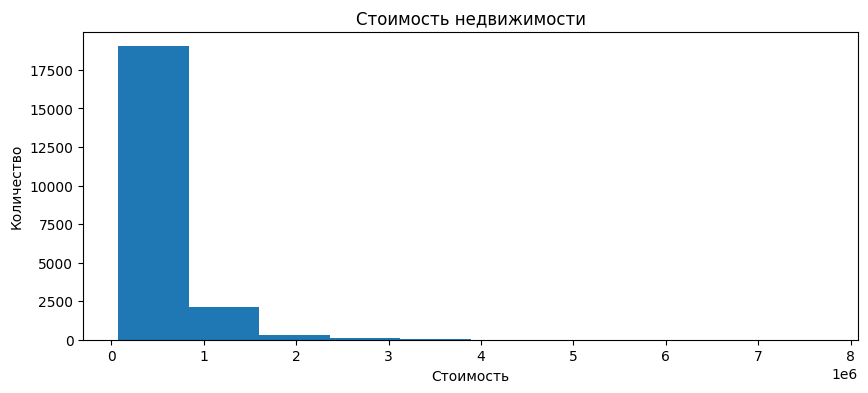

In [2]:
plt.figure(figsize=(10,4))
plt.hist(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [3]:
import seaborn as sns

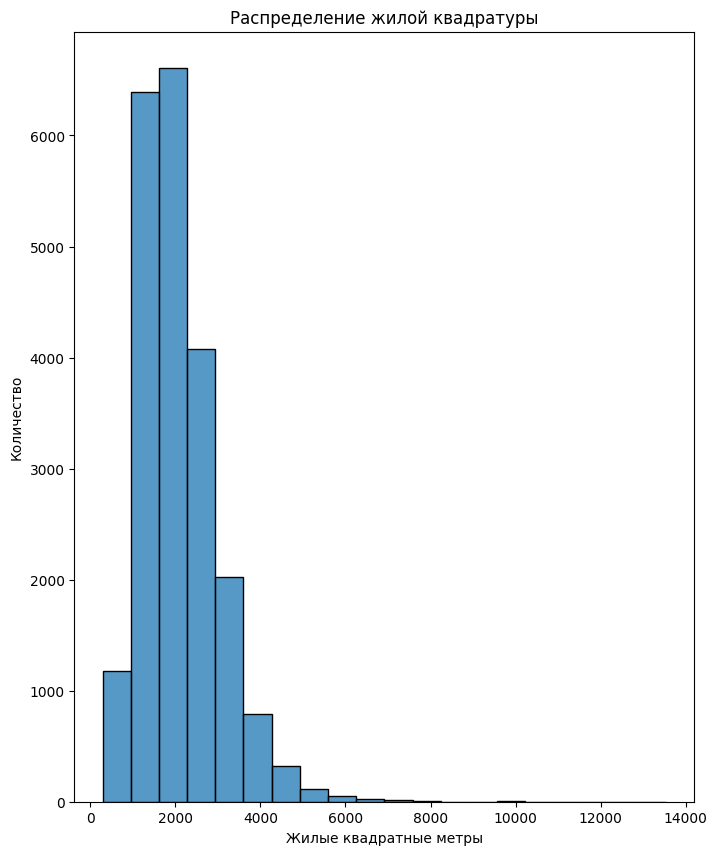

In [8]:
plt.figure(figsize=(8, 10))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество');

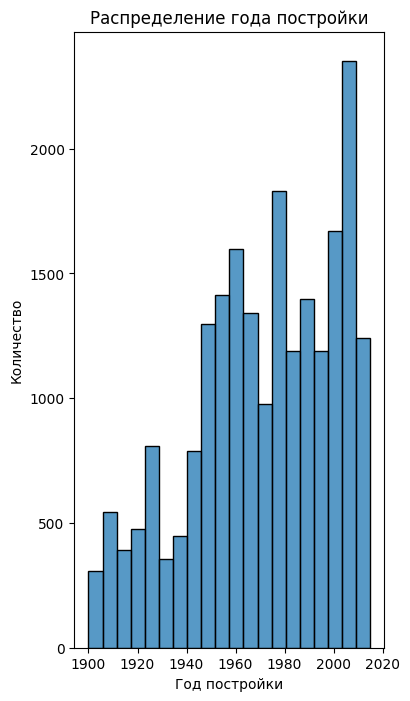

In [9]:
plt.figure(figsize=(4, 8))
sns.histplot(df['yr_built'], bins=20)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

#### 2 задача
##### 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

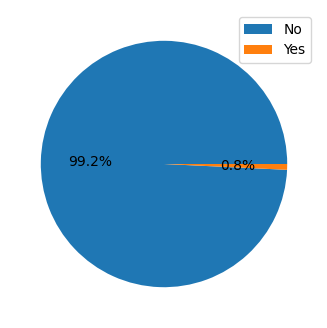

In [10]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(data, autopct='%.1f%%')
plt.legend(['No', 'Yes']);

Вывод: Домов с видом на набережную согласно графика 0,8% из 100.

##### 2.2. Изучите распределение этажей домов

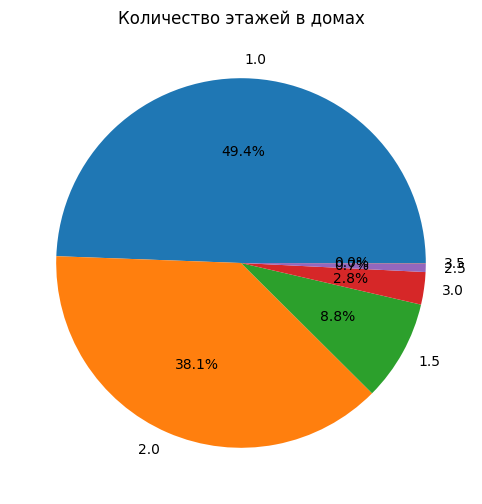

In [16]:
data1 = df['floors'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(data1, autopct='%.1f%%', labels=data1.index)
plt.title('Количество этажей в домах');

Вывод: Согласно графику больше всего домов одноэтажных (49,4% из 100)

##### 2.3. Изучите распределение состояния домов

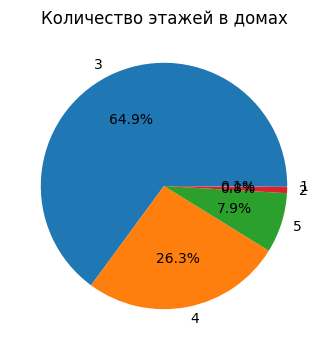

In [17]:
data2 = df['condition'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(data2, autopct='%.1f%%', labels=data2.index)
plt.title('Распределение состояния домов');

#### 3 задача
##### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
##### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

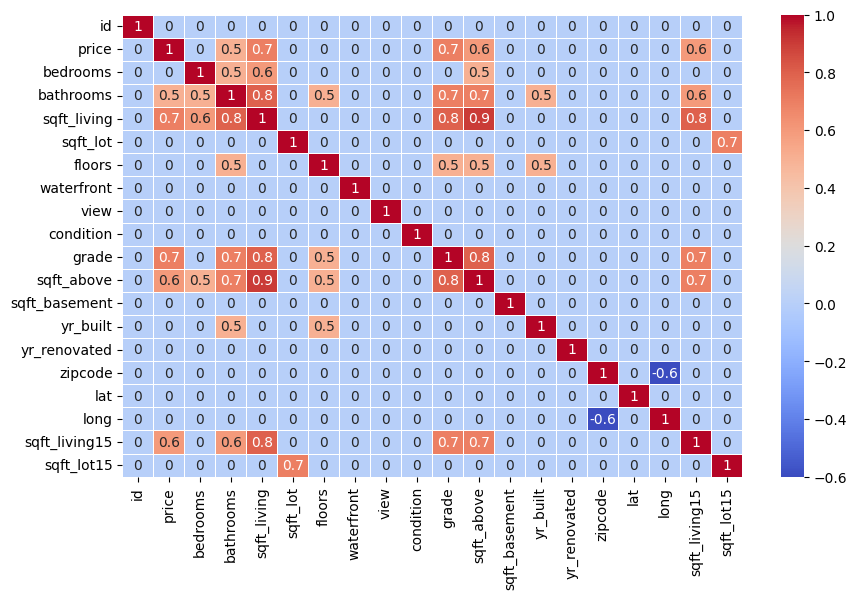

In [20]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0
corr_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

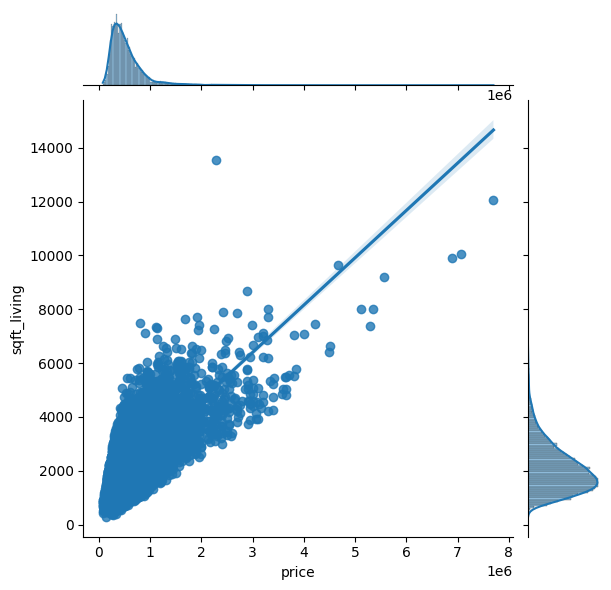

In [21]:
sns.jointplot(x = df['price'], y = df['sqft_living'], kind='reg');

Вывод: Согласна диаграмме, чем больше жилая площадь дома, тем выше стоимость этого дома.

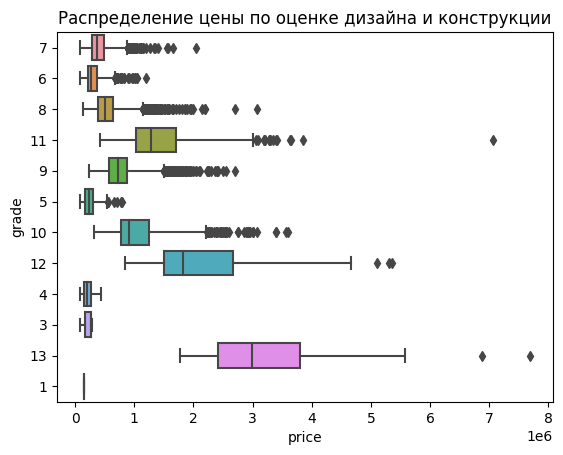

In [23]:
sns.boxplot(x=df['price'], y = df['grade'].astype('str'), whis=2);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Распределение цены по оценке дизайна и конструкции');

Вывод: Самая большая стоимость у домов с оценкой дизайна и конструкции 13.

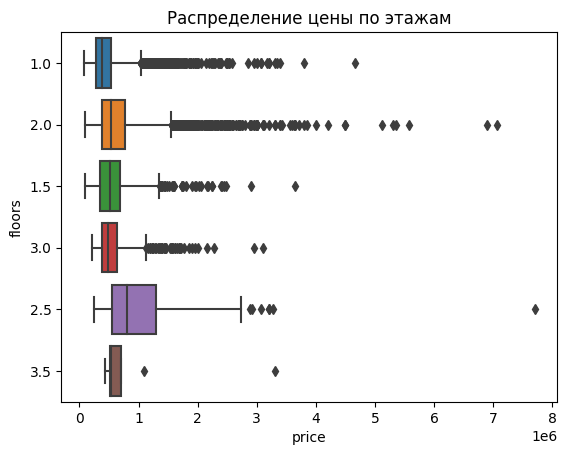

In [25]:
sns.boxplot(x=df['price'], y = df['floors'].astype('str'), whis=2);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Распределение цены по этажам');

Вывод: Самая большая стоимость домов с этажностью 2,5.